In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/cleaned_unemployment_in_america_per_us_state.csv')

In [3]:
df.head()

,State/Area,Year,Month,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,Alabama,1976,1,1484555,57.0,1386023,53.2,98532,6.6
1,Alaska,1976,1,160183,69.0,148820,64.1,11363,7.1
2,Arizona,1976,1,964120,59.5,865871,53.4,98249,10.2
3,Arkansas,1976,1,889044,57.9,824395,53.7,64649,7.3
4,California,1976,1,9774280,62.6,8875685,56.8,898595,9.2


In [4]:
numerical_columns = [
    'Total Civilian Labor Force in State/Area',
    'Total Employment in State/Area',
    'Total Unemployment in State/Area',
    'Percent (%) of State/Area\'s Population',
    'Percent (%) of Labor Force Employed in State/Area',
    'Percent (%) of Labor Force Unemployed in State/Area'
]

In [5]:
annual_data = df.groupby(['Year'])[numerical_columns].mean().reset_index()

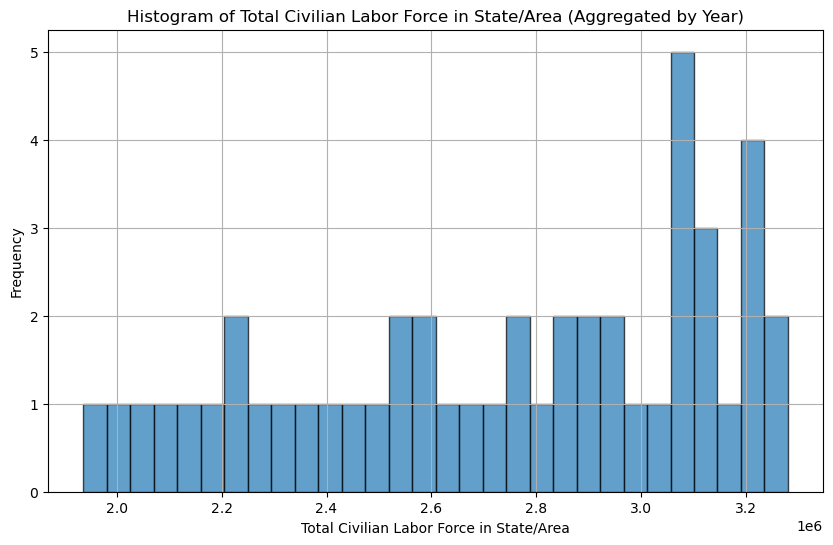

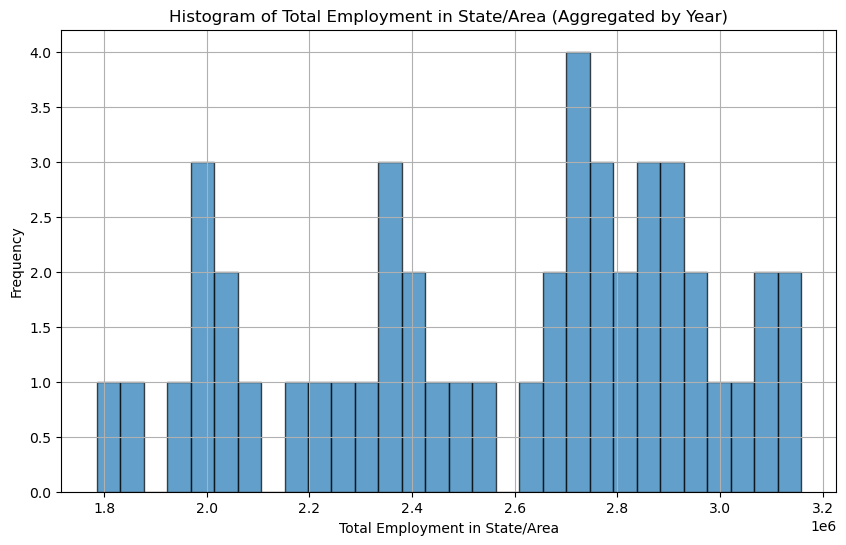

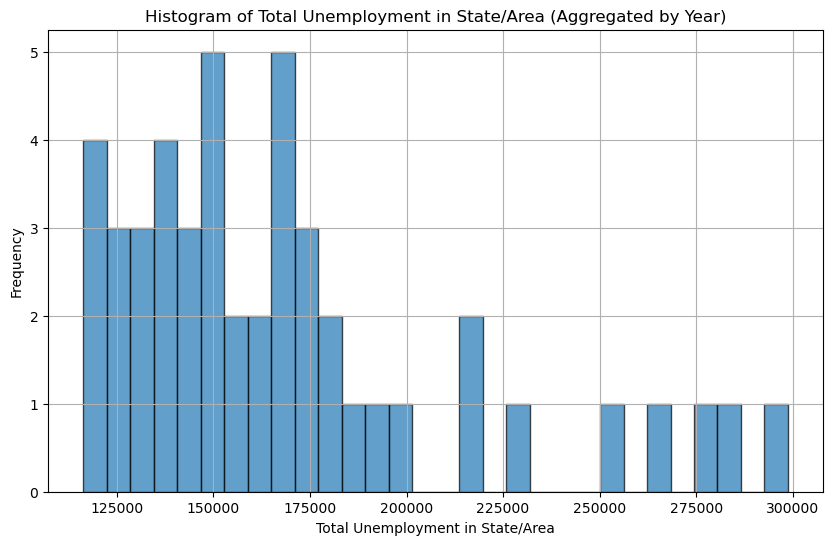

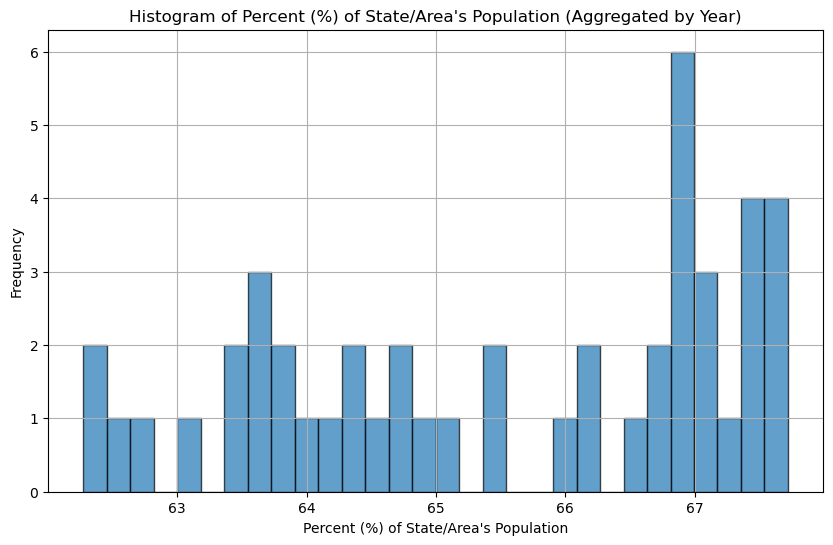

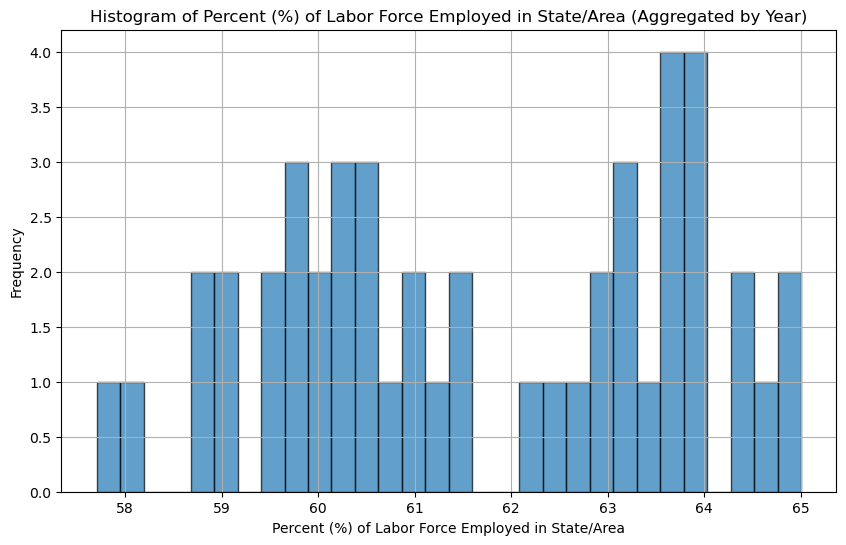

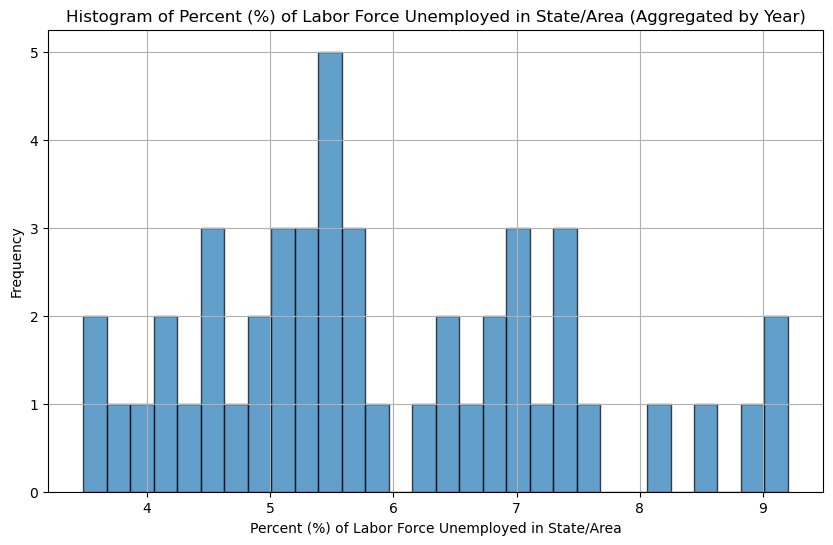

In [6]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(annual_data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column} (Aggregated by Year)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [7]:
stats = {}

for column in numerical_columns:
    stats[column] = {
        'Sum': df[column].sum(),
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Standard Deviation': df[column].std(),
        'Minimum': df[column].min(),
        'Maximum': df[column].max()
    }

In [8]:
stats_df = pd.DataFrame(stats)
print(stats_df)

                    Total Civilian Labor Force in State/Area  \
Sum                                             8.174943e+10   
Mean                                            2.734826e+06   
Median                                          1.878042e+06   
Standard Deviation                              2.942369e+06   
Minimum                                         1.600220e+05   
Maximum                                         1.960070e+07   

                    Total Employment in State/Area  \
Sum                                   7.668132e+10   
Mean                                  2.565279e+06   
Median                                1.750450e+06   
Standard Deviation                    2.748895e+06   
Minimum                               1.487180e+05   
Maximum                               1.875432e+07   

                    Total Unemployment in State/Area  \
Sum                                     5.068108e+09   
Mean                                    1.695473e+05   
Medi

In [9]:
state_pivot = df.pivot_table(index='State/Area', aggfunc='size').reset_index(name='Record Count')
print(state_pivot)

              State/Area  Record Count
0                Alabama           564
1                 Alaska           564
2                Arizona           564
3               Arkansas           564
4             California           564
5               Colorado           564
6            Connecticut           564
7               Delaware           564
8   District of Columbia           564
9                Florida           564
10               Georgia           564
11                Hawaii           564
12                 Idaho           564
13              Illinois           564
14               Indiana           564
15                  Iowa           564
16                Kansas           564
17              Kentucky           564
18    Los Angeles County           564
19             Louisiana           564
20                 Maine           564
21              Maryland           564
22         Massachusetts           564
23              Michigan           564
24             Minnesota 

In [10]:
year_pivot = df.pivot_table(index='Year', aggfunc='size').reset_index(name='Record Count')
print(year_pivot)

    Year  Record Count
0   1976           636
1   1977           636
2   1978           636
3   1979           636
4   1980           636
5   1981           636
6   1982           636
7   1983           636
8   1984           636
9   1985           636
10  1986           636
11  1987           636
12  1988           636
13  1989           636
14  1990           636
15  1991           636
16  1992           636
17  1993           636
18  1994           636
19  1995           636
20  1996           636
21  1997           636
22  1998           636
23  1999           636
24  2000           636
25  2001           636
26  2002           636
27  2003           636
28  2004           636
29  2005           636
30  2006           636
31  2007           636
32  2008           636
33  2009           636
34  2010           636
35  2011           636
36  2012           636
37  2013           636
38  2014           636
39  2015           636
40  2016           636
41  2017           636
42  2018   

In [11]:
month_pivot = df.pivot_table(index='Month', aggfunc='size').reset_index(name='Record Count')
print(month_pivot)

    Month  Record Count
0       1          2491
1       2          2491
2       3          2491
3       4          2491
4       5          2491
5       6          2491
6       7          2491
7       8          2491
8       9          2491
9      10          2491
10     11          2491
11     12          2491


In [12]:
monthly_data = df.groupby(['Year', 'Month'])[numerical_columns].mean().reset_index()

In [13]:
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

C:\Users\Chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


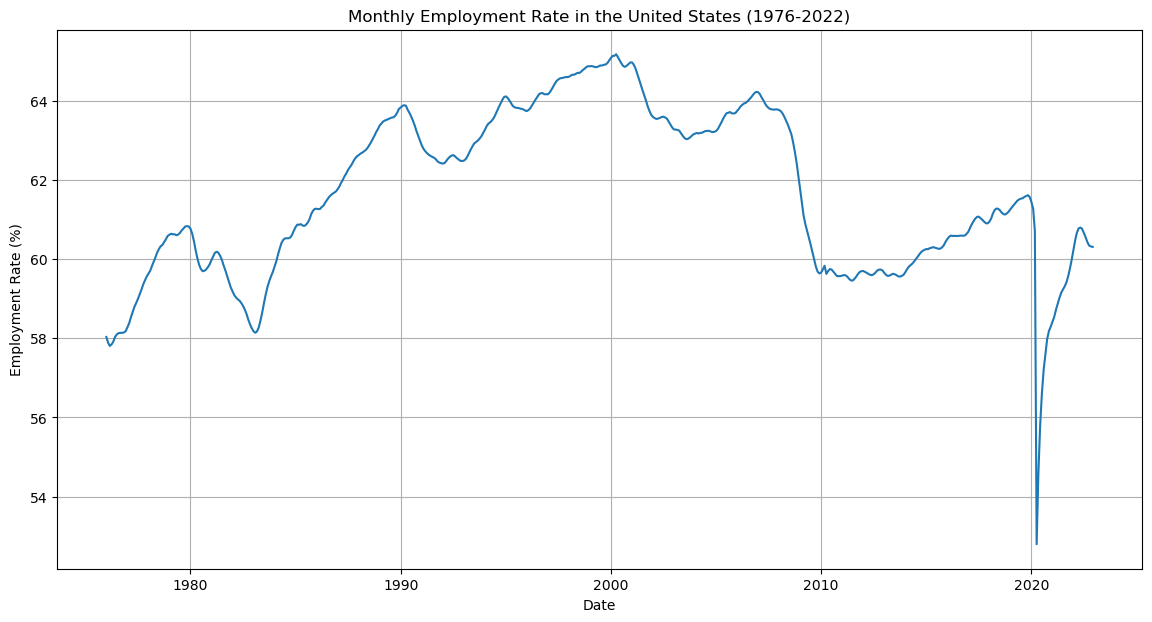

In [14]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x='Date', y='Percent (%) of Labor Force Employed in State/Area')
plt.title('Monthly Employment Rate in the United States (1976-2022)')
plt.xlabel('Date')
plt.ylabel('Employment Rate (%)')
plt.grid(True)
plt.show()

C:\Users\Chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


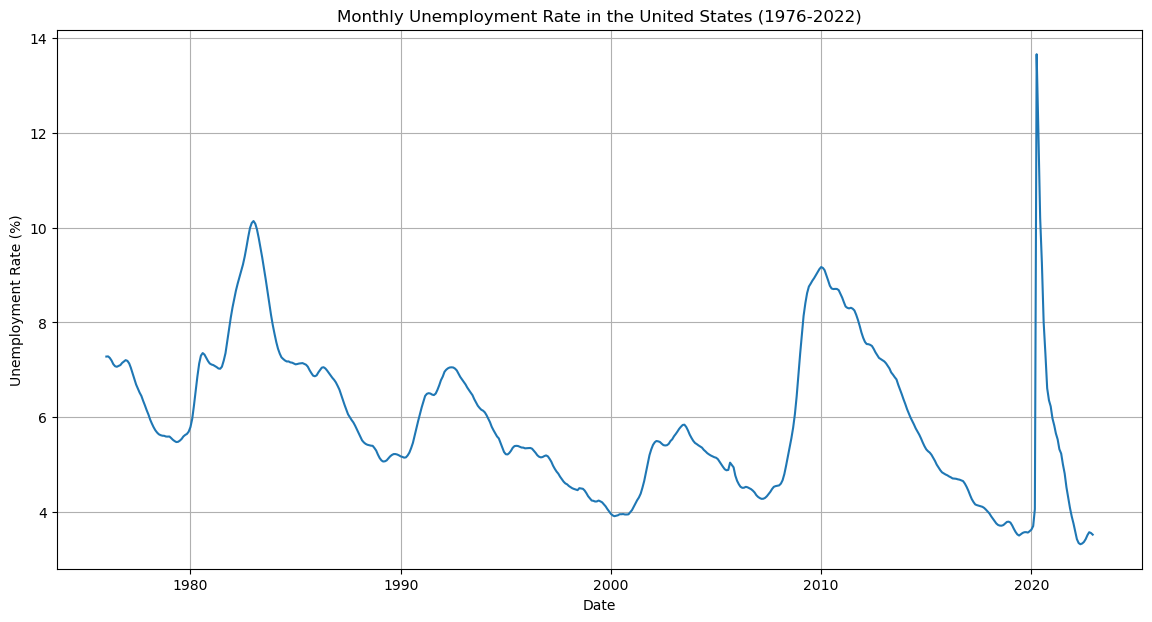

In [15]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x='Date', y='Percent (%) of Labor Force Unemployed in State/Area')
plt.title('Monthly Unemployment Rate in the United States (1976-2022)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

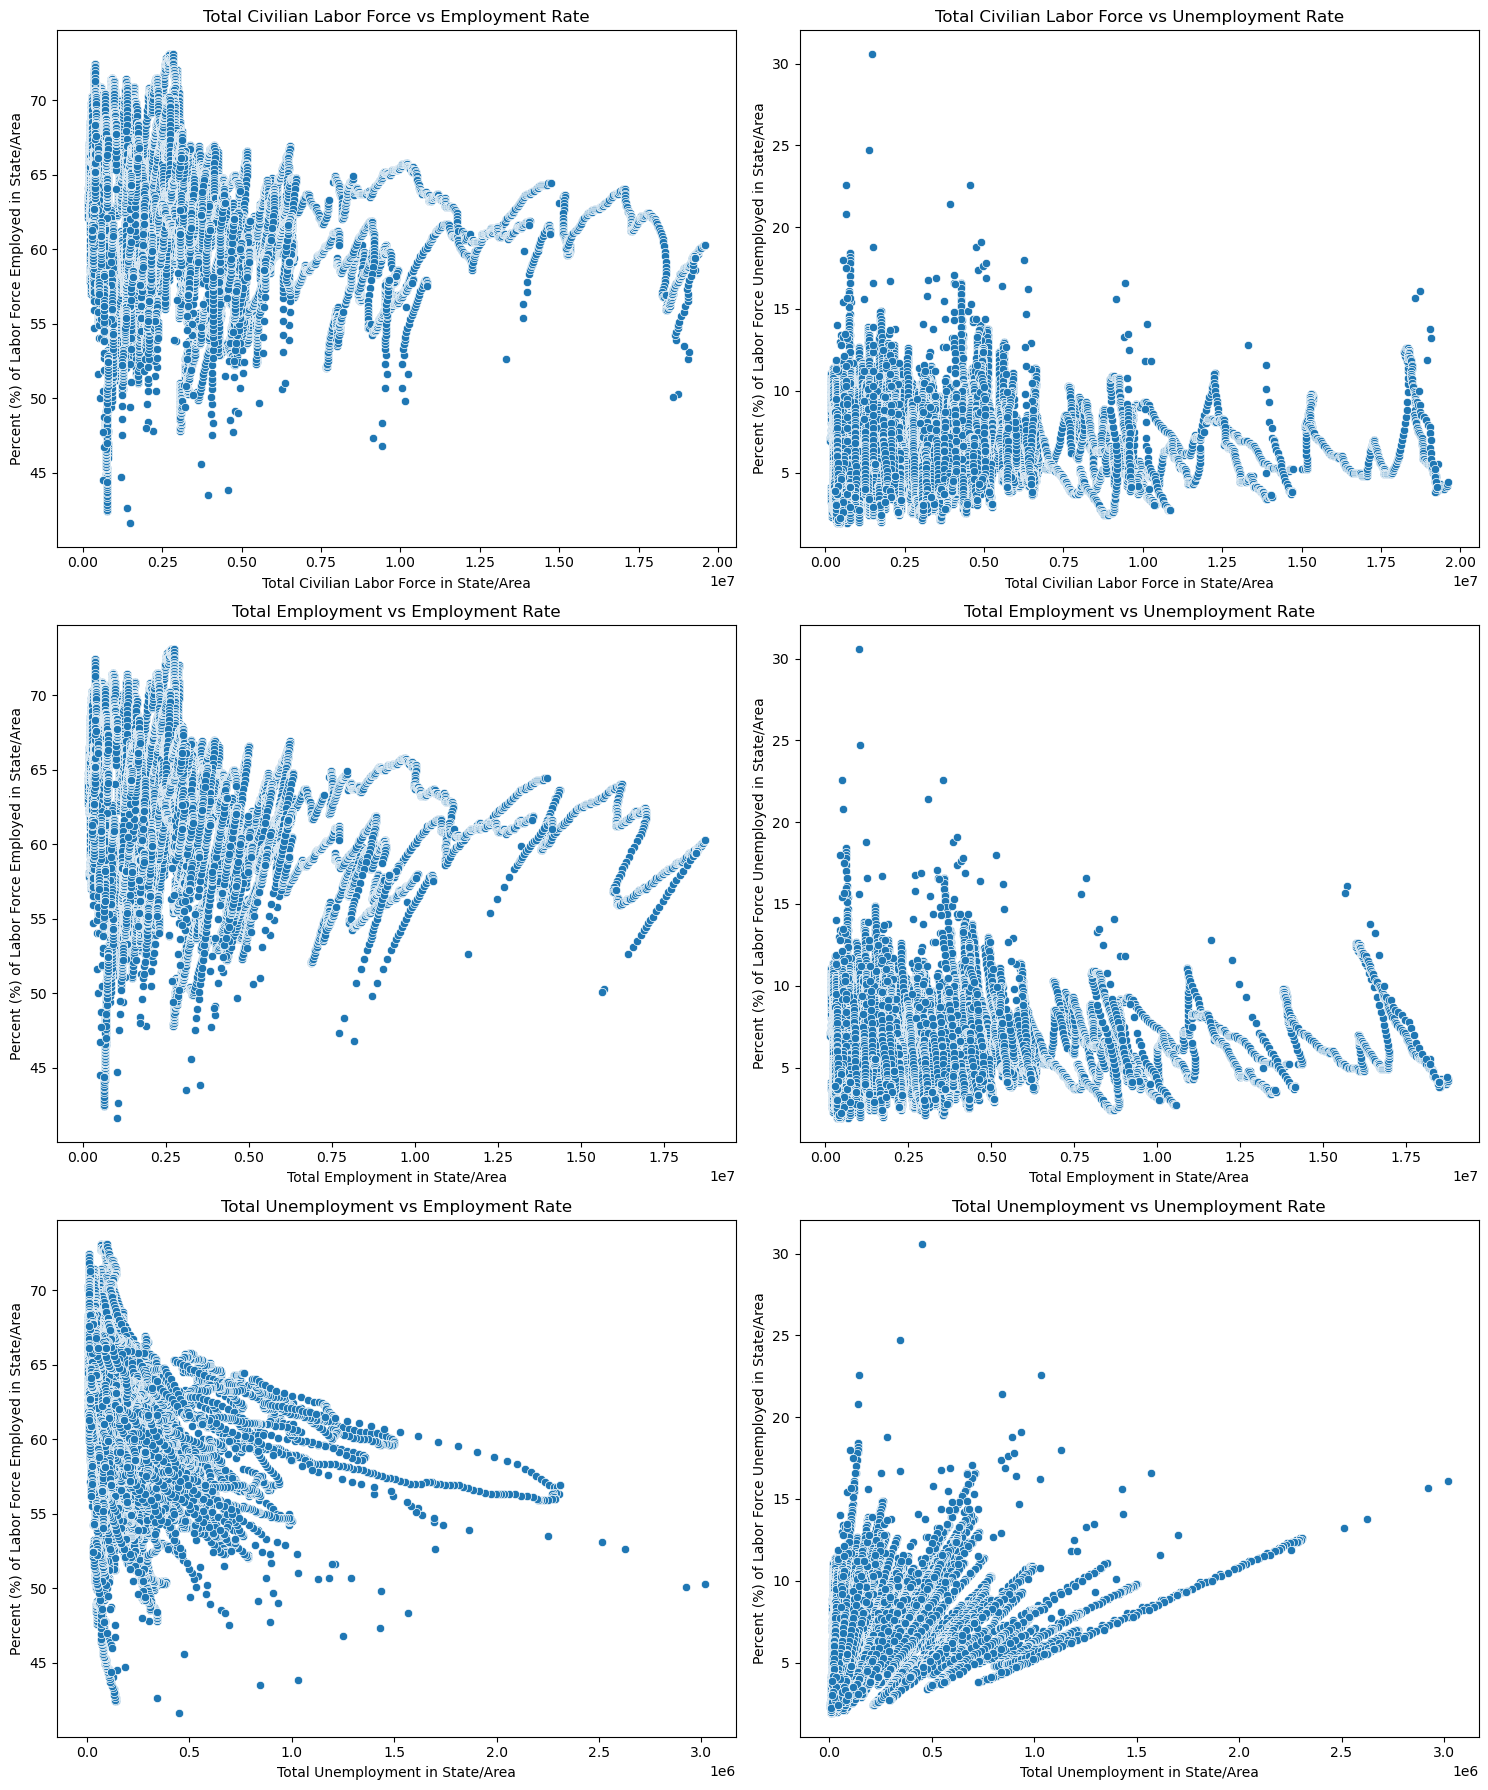

In [40]:
# Selecting columns of interest
columns_of_interest = [
    'Total Civilian Labor Force in State/Area',
    'Total Employment in State/Area',
    'Total Unemployment in State/Area',
    'Percent (%) of Labor Force Employed in State/Area',
    'Percent (%) of Labor Force Unemployed in State/Area'
]

# Plotting scatter plots for more detailed view
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

sns.scatterplot(x='Total Civilian Labor Force in State/Area', 
                y='Percent (%) of Labor Force Employed in State/Area', 
                data=df, ax=axes[0, 0])
axes[0, 0].set_title('Total Civilian Labor Force vs Employment Rate')

sns.scatterplot(x='Total Civilian Labor Force in State/Area', 
                y='Percent (%) of Labor Force Unemployed in State/Area', 
                data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Civilian Labor Force vs Unemployment Rate')

sns.scatterplot(x='Total Employment in State/Area', 
                y='Percent (%) of Labor Force Employed in State/Area', 
                data=df, ax=axes[1, 0])
axes[1, 0].set_title('Total Employment vs Employment Rate')

sns.scatterplot(x='Total Employment in State/Area', 
                y='Percent (%) of Labor Force Unemployed in State/Area', 
                data=df, ax=axes[1, 1])
axes[1, 1].set_title('Total Employment vs Unemployment Rate')

sns.scatterplot(x='Total Unemployment in State/Area', 
                y='Percent (%) of Labor Force Employed in State/Area', 
                data=df, ax=axes[2, 0])
axes[2, 0].set_title('Total Unemployment vs Employment Rate')

sns.scatterplot(x='Total Unemployment in State/Area', 
                y='Percent (%) of Labor Force Unemployed in State/Area', 
                data=df, ax=axes[2, 1])
axes[2, 1].set_title('Total Unemployment vs Unemployment Rate')

plt.tight_layout()
plt.show()

                                                    Total Civilian Labor Force in State/Area  \
Total Civilian Labor Force in State/Area                                            1.000000   
Total Employment in State/Area                                                      0.999469   
Total Unemployment in State/Area                                                    0.908608   
Percent (%) of Labor Force Employed in State/Area                                  -0.173580   
Percent (%) of Labor Force Unemployed in State/...                                  0.117499   

                                                    Total Employment in State/Area  \
Total Civilian Labor Force in State/Area                                  0.999469   
Total Employment in State/Area                                            1.000000   
Total Unemployment in State/Area                                          0.894511   
Percent (%) of Labor Force Employed in State/Area                        -0.163

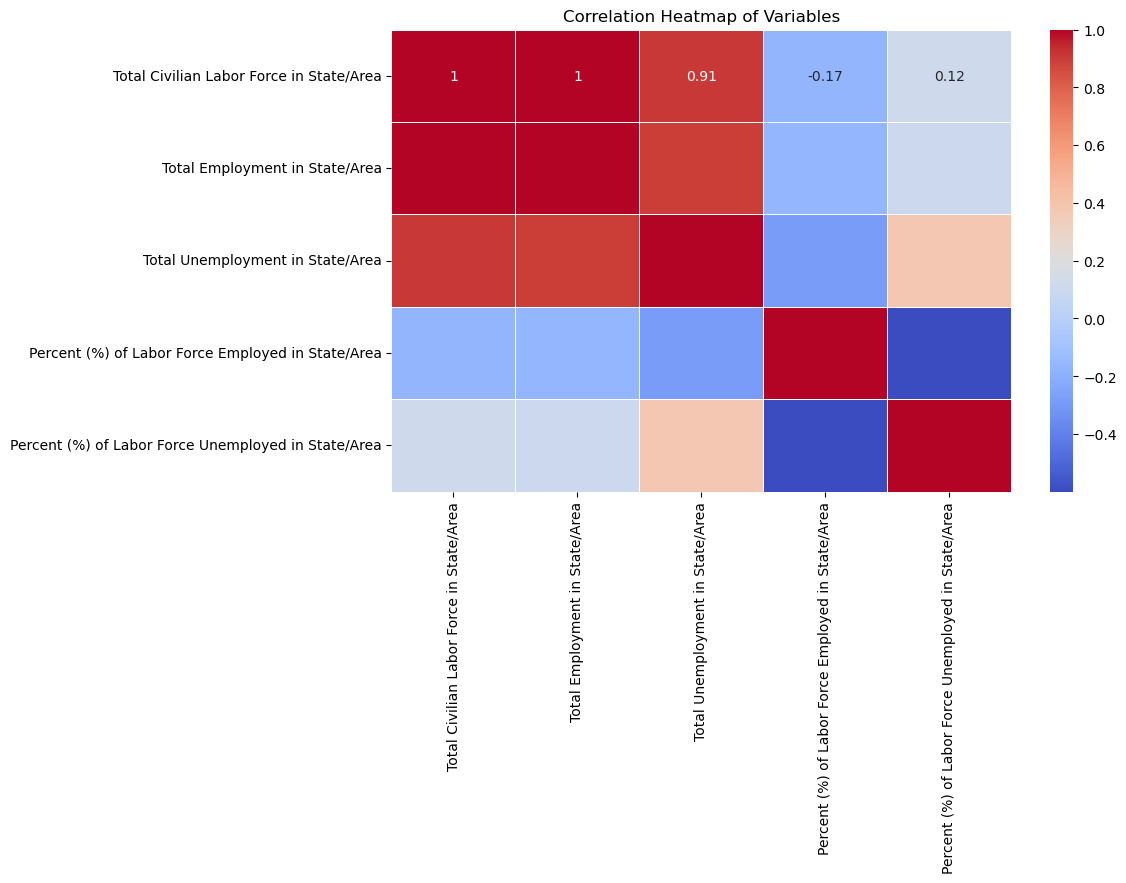

In [42]:
# Calculate the correlation matrix
correlation_matrix = df[['Total Civilian Labor Force in State/Area',
                         'Total Employment in State/Area',
                         'Total Unemployment in State/Area',
                         'Percent (%) of Labor Force Employed in State/Area',
                         'Percent (%) of Labor Force Unemployed in State/Area']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()